## Compare Results

A couple of these stars have existing $\nu\sin(i)$ measurements. Let's compare them to see if we find ourselves in the right ballpark.

In [73]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import astropy.units as u
import mystyle


sns.set_palette('colorblind')
import mystyle
plt.style.use(mystyle.ms)



In [2]:
ati = pd.read_csv('../../data/atium.csv',index_col=0)
#Exclude those stars with a Rhat > 1.1 flag and no results otherwise
ati = ati[np.isfinite(ati.nus.values)]
ati = ati.loc[ati.flag != 'rhat_1' ]
# ati = ati.loc[ati.flag != 'rhat_01' ]
print(f'We have {len(ati)} stars with Rhats below 1.01')

We have 82 stars with Rhats below 1.01


In [3]:
lit = pd.DataFrame()
lit['KIC'] = ati.KIC.copy()

Read in [Campante et al. 2016](https://ui.adsabs.harvard.edu/abs/2016ApJ...819...85C/abstract) **seismic periods** and **spectroscopic vsini**

In [4]:
C16 = pd.read_csv('../../data/campante_2015.txt',sep='\s+')
lit = pd.merge(lit, C16, on='KIC', how='left')

Read in [LEGACY](https://ui.adsabs.harvard.edu/abs/2017ApJ...835..172L/abstract) **spectroscopic vsini** values

In [5]:
L17 = pd.read_csv('../../data/malatium.csv',usecols=['KIC','vsini']).rename(columns={'vsini':'L17_vsini'})
lit = pd.merge(lit, L17, on='KIC', how='left')

Add the [Davies et al. 2015](https://ui.adsabs.harvard.edu/abs/2015MNRAS.446.2959D/abstract) **asteroseismic vsini** 16 Cyg A & B data

16CygA = 12069424 |
16CygB = 12069449

In [6]:
lit['D16_vsini'] = np.nan
lit['D16_evsini'] = np.nan
lit['D16_P_rot'] = np.nan
lit['D16_u_eP_rot'] =np.nan
lit['D16_l_eP_rot'] =np.nan


lit.loc[lit.KIC == 12069424, 'D16_vsini'] = 2.23
lit.loc[lit.KIC == 12069424, 'D16_evsini'] = 0.07
lit.loc[lit.KIC == 12069424, 'D16_P_rot'] = 23.8
lit.loc[lit.KIC == 12069424, 'D16_u_eP_rot'] = 1.5
lit.loc[lit.KIC == 12069424, 'D16_l_eP_rot'] = 1.8

lit.loc[lit.KIC == 12069449, 'D16_vsini'] = 1.35
lit.loc[lit.KIC == 12069449, 'D16_evsini'] = 0.08
lit.loc[lit.KIC == 12069449, 'D16_P_rot'] = 23.2
lit.loc[lit.KIC == 12069449, 'D16_u_eP_rot'] = 11.5
lit.loc[lit.KIC == 12069449, 'D16_l_eP_rot'] = 3.2

Add the [Nielsen et al. 2015](https://ui.adsabs.harvard.edu/abs/2015A%26A...582A..10N/abstract) **seismic periods**

In [7]:
lit['N15_P_rot'] = np.nan
lit['N15_u_eP_rot'] =np.nan
lit['N15_l_eP_rot'] =np.nan

lit.loc[lit.KIC == 4914923, 'N15_P_rot'] = 17.98
lit.loc[lit.KIC == 4914923, 'N15_u_eP_rot'] = 3.17
lit.loc[lit.KIC == 4914923, 'N15_l_eP_rot'] = 2.27

lit.loc[lit.KIC == 5184732, 'N15_P_rot'] = 19.44
lit.loc[lit.KIC == 5184732, 'N15_u_eP_rot'] = 1.63
lit.loc[lit.KIC == 5184732, 'N15_l_eP_rot'] = 2.13

lit.loc[lit.KIC == 6116048, 'N15_P_rot'] = 17.61
lit.loc[lit.KIC == 6116048, 'N15_u_eP_rot'] = 0.95
lit.loc[lit.KIC == 6116048, 'N15_l_eP_rot'] = 1.31

lit.loc[lit.KIC == 6933899, 'N15_P_rot'] = 29.92
lit.loc[lit.KIC == 6933899, 'N15_u_eP_rot'] = 4.90
lit.loc[lit.KIC == 6933899, 'N15_l_eP_rot'] = 6.76

lit.loc[lit.KIC == 10963065, 'N15_P_rot'] = 12.01
lit.loc[lit.KIC == 10963065, 'N15_u_eP_rot'] = 1.42
lit.loc[lit.KIC == 10963065, 'N15_l_eP_rot'] = 1.09

Add the [Benomar et al. 2018](https://ui.adsabs.harvard.edu/abs/2018Sci...361.1231B/abstract) latitudinal rotation periods

We will use the $a1$ parameter, which in this case is equal to the global rotational splitting in absense of latitudinal differential rotation.

In [8]:
B18 = pd.read_csv('../../data/benomar_2018_rot.txt', sep='\s+')

In [9]:
B18['lowa1'] = B18['a1'] - B18['l_a1']
B18['upa1'] = B18['a1'] + B18['u_a1']

B18['B18_P_rot'] = (1./u.Quantity(B18['a1'].values, u.nanohertz).to(1/u.day)).value
B18['B18_l_eP_rot'] = (1./u.Quantity(B18['lowa1'].values, u.nanohertz).to(1/u.day)).value - B18['B18_P_rot']
B18['B18_u_eP_rot'] = B18['B18_P_rot'] - (1./u.Quantity(B18['upa1'].values, u.nanohertz).to(1/u.day)).value

In [10]:
lit = pd.merge(lit, B18[['KIC','B18_P_rot','B18_l_eP_rot','B18_u_eP_rot']], on='KIC', how='left')

## Plot Spectroscopic $v\sin(i)$

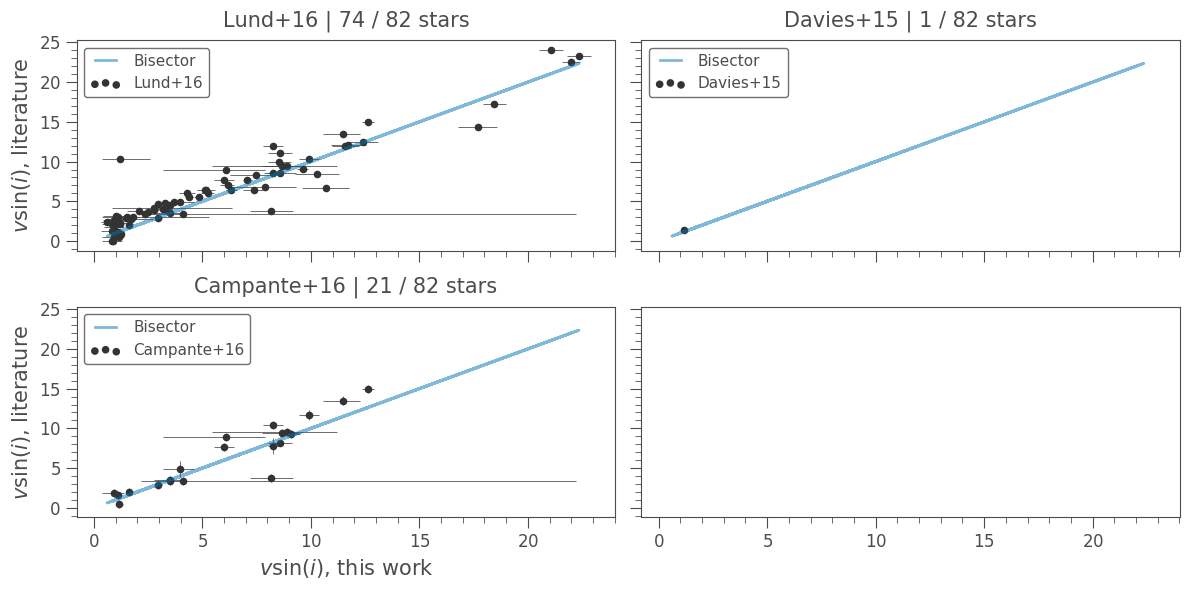

In [11]:
with plt.style.context(mystyle.ms):
    fig, ax = plt.subplots(2,2,figsize=(12,6), sharex=True, sharey=True)
    axl = ax[0,0]
    c = axl.scatter(ati['vsini'], lit['L17_vsini'], lw=1, s=20, zorder=2, label='Lund+16')
    axl.errorbar(ati['vsini'], lit['L17_vsini'], xerr=[ati['l_vsini'], ati['u_vsini']],
                fmt='|', zorder=1)
    axl.set_axisbelow(True)
    axl.set_ylabel(r'$v\sin(i)$, literature')
    axl.set_title(f'Lund+16 | {len(lit[np.isfinite(lit.L17_vsini)])} / {len(lit)} stars', fontsize=15)

    axc = ax[1,0]
    c = axc.scatter(ati['vsini'], lit['C15_vsini'], lw=1, s=20, zorder=2, label='Campante+16')
    axc.errorbar(ati['vsini'], lit['C15_vsini'], xerr=[ati['l_vsini'], ati['u_vsini']], yerr=lit['C15_evsini'],
                fmt='|', zorder=1)
    axc.set_axisbelow(True)
    axc.set_xlabel(r'$v\sin(i)$, this work')
    axc.set_ylabel(r'$v\sin(i)$, literature')
    axc.set_title(f'Campante+16 | {len(lit[np.isfinite(lit.C15_vsini)])} / {len(lit)} stars', fontsize=15)    
    
    
    axd = ax[0,1]
    c = axd.scatter(ati['vsini'], lit['D16_vsini'], lw=1,s=20, zorder=2, label='Davies+15')
    axd.errorbar(ati['vsini'], lit['D16_vsini'], xerr=[ati['l_vsini'], ati['u_vsini']], yerr=lit['D16_evsini'],
                fmt='|', zorder=1)
    axd.set_axisbelow(True)
    axd.set_title(f'Davies+15 | {len(lit[np.isfinite(lit.D16_vsini)])} / {len(lit)} stars', fontsize=15)   


    axc.plot(ati['vsini'],ati['vsini'],lw=2, alpha=.5, label='Bisector')
    axd.plot(ati['vsini'],ati['vsini'],lw=2, alpha=.5, label='Bisector')
    axl.plot(ati['vsini'],ati['vsini'],lw=2, alpha=.5, label='Bisector')
    axc.legend()
    axd.legend()
    axl.legend()

    
    fig.tight_layout()
    plt.show()



## Plot Periods

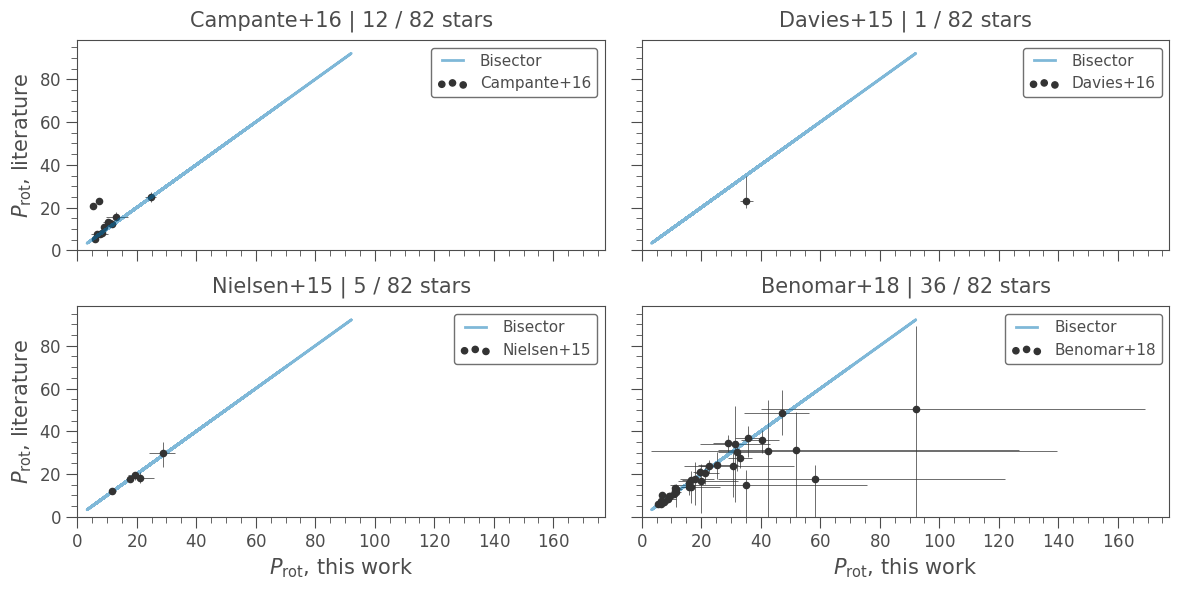

In [23]:
with plt.style.context(mystyle.ms):
    fig, ax = plt.subplots(2,2,figsize=(12,6), sharex=True, sharey=True)
    axc = ax[0,0]
    c = axc.scatter(ati['P'], lit['C15_P_rot'], lw=1,s=20, zorder=2, label='Campante+16')
    axc.errorbar(ati['P'], lit['C15_P_rot'], xerr=[ati['l_P'], ati['u_P']], yerr=lit['C15_eP_rot'],
                fmt='|', zorder=1)
    axc.set_axisbelow(True)
    axc.set_ylabel(r'$P_{\rm rot}$, literature')
    axc.set_title(f'Campante+16 | {len(lit[np.isfinite(lit.C15_P_rot)])} / {len(lit)} stars', fontsize=15)

    axn = ax[1,0]
    c = axn.scatter(ati['P'], lit['N15_P_rot'], lw=1,s=20, zorder=3, label='Nielsen+15')
    axn.errorbar(ati['P'], lit['N15_P_rot'], xerr=[ati['l_P'], ati['u_P']],
                 yerr=[lit['N15_l_eP_rot'],lit['N15_u_eP_rot']],
                 fmt='|', zorder=1)     
    axn.set_axisbelow(True)
    axn.set_xlabel(r'$P_{\rm rot}$, this work')
    axn.set_ylabel(r'$P_{\rm rot}$, literature')
    axn.set_title(f'Nielsen+15 | {len(lit[np.isfinite(lit.N15_P_rot)])} / {len(lit)} stars', fontsize=15)    
    
    axd = ax[0,1]
    c = axd.scatter(ati['P'], lit['D16_P_rot'], lw=1,s=20, zorder=4, label='Davies+16')
    axd.errorbar(ati['P'], lit['D16_P_rot'], xerr=[ati['l_P'], ati['u_P']],
                 yerr=[lit['D16_l_eP_rot'],lit['D16_u_eP_rot']],
                 fmt='|', zorder=1)
    axd.set_title(f'Davies+15 | {len(lit[np.isfinite(lit.D16_P_rot)])} / {len(lit)} stars', fontsize=15)    
    

    axb = ax[1,1]
    c = axb.scatter(ati['P'], lit['B18_P_rot'], lw=1,s=20, zorder=5, label='Benomar+18')
    axb.errorbar(ati['P'], lit['B18_P_rot'], xerr=[ati['l_P'], ati['u_P']],
                 yerr=[lit['B18_l_eP_rot'],lit['B18_u_eP_rot']],
                 fmt='|', zorder=1)
    axb.set_title(f'Benomar+18 | {len(lit[np.isfinite(lit.B18_P_rot)])} / {len(lit)} stars', fontsize=15)    
    axb.set_xlabel(r'$P_{\rm rot}$, this work')
    

    axc.plot(ati['P'],ati['P'],lw=2, alpha=.5, label='Bisector')
    axd.plot(ati['P'],ati['P'],lw=2, alpha=.5, label='Bisector')
    axn.plot(ati['P'],ati['P'],lw=2, alpha=.5, label='Bisector')    
    axb.plot(ati['P'],ati['P'],lw=2, alpha=.5, label='Bisector')
    axc.legend()
    axd.legend()
    axb.legend()
    axn.legend()
    axc.set_xlim(0)
    axd.set_xlim(0)
    axb.set_xlim(0)
    axn.set_xlim(0)
    axc.set_ylim(0)
    axd.set_ylim(0)
    axb.set_ylim(0)
    axn.set_ylim(0)    
    
    fig.tight_layout()
    plt.show()



## Investigate inclinations

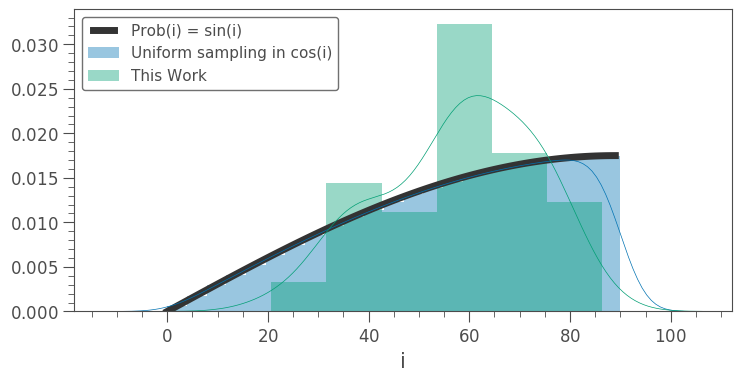

In [67]:
with plt.style.context(mystyle.ms):
    plt.plot(0.0175 * np.sin(np.linspace(0, np.pi/2., 90)), lw=5, label='Prob(i) = sin(i)')
    sns.distplot(90*(np.arccos(np.linspace(0, 1, 5000))/(np.pi/2)), label='Uniform sampling in cos(i)')
    sns.distplot(90*ati.i/(np.pi/2), label='This Work')

    
    plt.legend()

## Comparison with unpublished LEGACY and Kages data

### Adding LEGACY data

In [70]:
list(ati)

['KIC',
 'Teff',
 'age',
 'dnu',
 'eTeff',
 'ednu',
 'efeh',
 'enumax',
 'feh',
 'loage',
 'lomodlogg',
 'lomodmass',
 'lomodrad',
 'modlogg',
 'modmass',
 'modrad',
 'numax',
 'source',
 'upage',
 'upmodlogg',
 'upmodmass',
 'upmodrad',
 'G',
 'bprp',
 'nus*',
 'l_nus*',
 'u_nus*',
 'cosi',
 'l_cosi',
 'u_cosi',
 'i',
 'l_i',
 'u_i',
 'nus',
 'l_nus',
 'u_nus',
 'P',
 'l_P',
 'u_P',
 'vsini',
 'l_vsini',
 'u_vsini',
 'fit_numax',
 'efit_numax',
 'fit_d01',
 'efit_d01',
 'fit_d02',
 'efit_d02',
 'fit_epsilon',
 'efit_epsilon',
 'V1',
 'eV1',
 'V2',
 'eV2',
 'flag',
 'chainflag',
 'ebprp']

In [71]:
col = pd.DataFrame()
col['KIC'] = ati.KIC.copy()
col['i'] = np.nan
col['u_i'] = np.nan
col['l_i'] = np.nan
col['nus'] = np.nan
col['l_nus'] = np.nan
col['u_nus'] = np.nan
col['P'] = np.nan
col['l_P'] = np.nan
col['u_P'] = np.nan

In [92]:
for idx in range(5):
    kic = str(ati.loc[idx].KIC)
    files = glob.glob(f'../../data/legacy_rotation/inc_split/{kic}*.txt')

    try:
        chains = np.genfromtxt(files[0])
    except IndexError:
        print('Star not included in LEGACY')
        continue

In [98]:
np.genfromtxt(files[0]).shape

(300, 6)

In [84]:
kic

'1435467'